## Accidents by mounth

In [35]:
import pandas as pd
import numpy as np
from google.cloud import bigquery

#Extract the data from bigquery
client = bigquery.Client(project='phydata-desafio1')
QUERY5 = """
SELECT
  state_name,
  EXTRACT(MONTH FROM timestamp_of_crash) AS month_number,
  COUNT(*) AS num_accidents
FROM
  `phydata-desafio1.nhtsa_traffic_fatalities.accident_2015`
GROUP BY
  state_name, month_number
ORDER BY
state_name, month_number
  """
query_job = client.query(QUERY5)  # API request
results = query_job.result()  # Waits for query to finish
data_frame_month = results.to_dataframe()
name_database = 'state_name_accidents_by_month' # Name of the database
data_frame_month.to_csv(name_database + '.csv', index=False) #Save the data in a csv file

In [37]:
import pandas as pd

df = pd.read_csv('state_name_accidents_by_month.csv') #Read the csv file
#changing the number of the month for the name of the month

month_name = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}
# Aplica la conversión a nombres de meses utilizando el diccionario.
df['month_name'] = df['month_number'].map(month_name)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Enero'),
  Text(1, 0, 'Febrero'),
  Text(2, 0, 'Marzo'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Mayo'),
  Text(5, 0, 'Junio'),
  Text(6, 0, 'Julio'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Septiembre'),
  Text(9, 0, 'Octubre'),
  Text(10, 0, 'Noviembre'),
  Text(11, 0, 'Diciembre')])

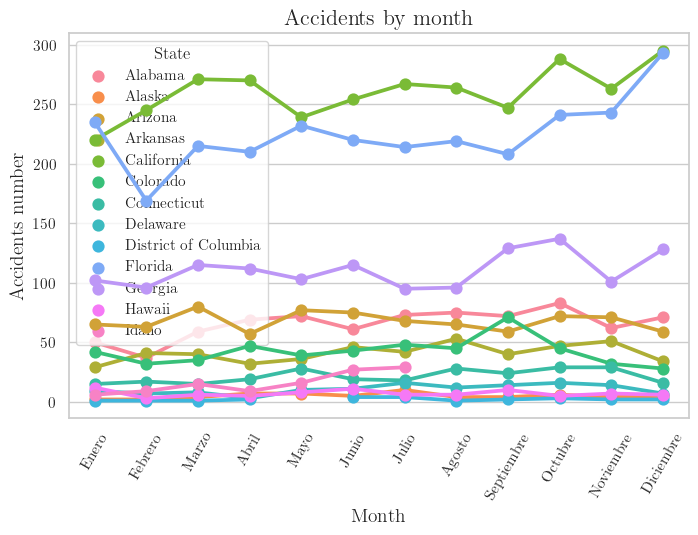

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear el gráfico con seaborn
result_limitado = df.head(150)
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sns.pointplot(x='month_name', y='num_accidents', data=result_limitado, hue='state_name')
legend = plt.legend(title="State")
legend.set_zorder(2)  # Ajusta el valor de zorder para colocar la leyenda por encima de las líneas


# Etiquetas y título
plt.xlabel(r'Month',fontdict={'fontsize': 14})
plt.ylabel(r'Accidents number',fontdict={'fontsize': 14})
plt.title(r'Accidents by month',fontdict={'fontsize': 16})
plt.xticks(rotation=60)